## Imports All Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance

## Load Dataset

In [2]:
df = pd.read_csv("C:\\Users\\savita\\Downloads\\Finance_Trends.csv")
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Male,29,Yes,2,4,7,5,3,1,6,...,Less than 1 year,Weekly,20%-30%,Public Provident Fund,Health Care,Dividend,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines
1,Male,28,Yes,2,3,6,5,1,4,7,...,Less than 1 year,Weekly,30%-40%,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Television
2,Female,28,Yes,2,3,7,5,4,1,6,...,3-5 years,Daily,10%-20%,Mutual Fund,Health Care,Dividend,Better Returns,Assured Returns,Risk Free,Financial Consultants
3,Male,19,Yes,2,3,7,4,6,1,5,...,More than 5 years,Monthly,10%-20%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
4,Male,32,Yes,2,4,7,5,3,1,6,...,More than 5 years,Weekly,10%-20%,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants


In [3]:
df.shape

(12000, 24)

In [4]:
# Null Value 
print(df.isnull().sum())

# Data Information
print(df.info())

gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1

In [5]:
# Statistic analysis
df.describe()

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,27.779000,2.534583,3.459000,5.777750,4.670333,3.556333,2.023583,5.978417
std,4.056316,1.168511,1.112245,1.638824,1.330276,1.757200,1.592086,1.119697
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,25.000000,2.000000,3.000000,5.000000,4.000000,2.000000,1.000000,6.000000
50%,28.000000,2.000000,4.000000,7.000000,5.000000,3.000000,1.000000,6.000000
75%,31.000000,3.000000,4.000000,7.000000,5.000000,5.000000,3.000000,7.000000
max,38.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000


## Exploratory Data Analysis (EDA)

Numeric columns : ['age', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']


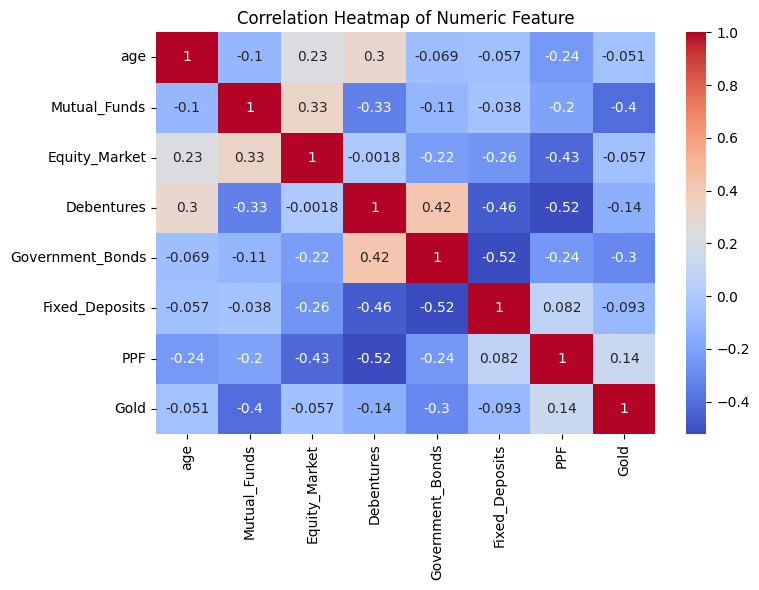

In [6]:
# numeric values
numeric = df.select_dtypes(include='int64')
print('Numeric columns :', numeric.columns.tolist())

corr = numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Feature')
plt.tight_layout()
plt.show()

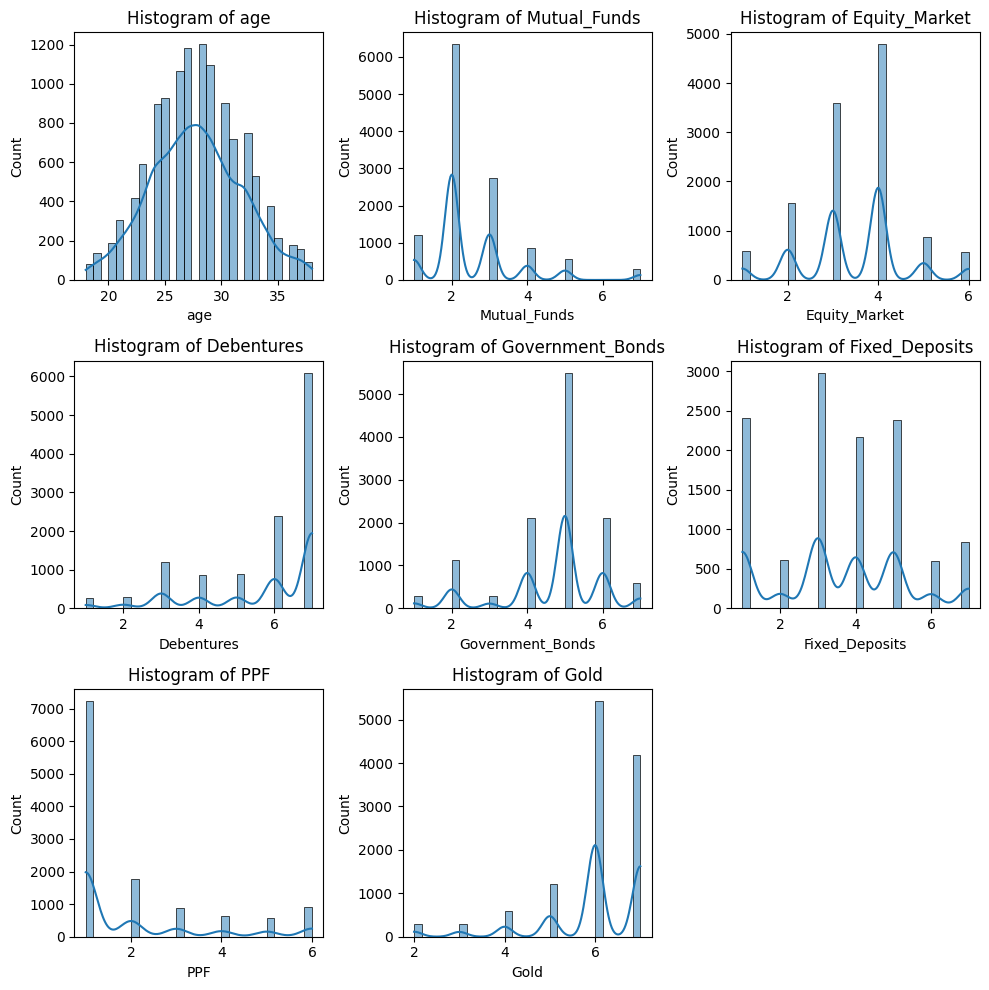

In [7]:
numeric_columns = numeric.columns
plt.figure(figsize=(10, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(numeric[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

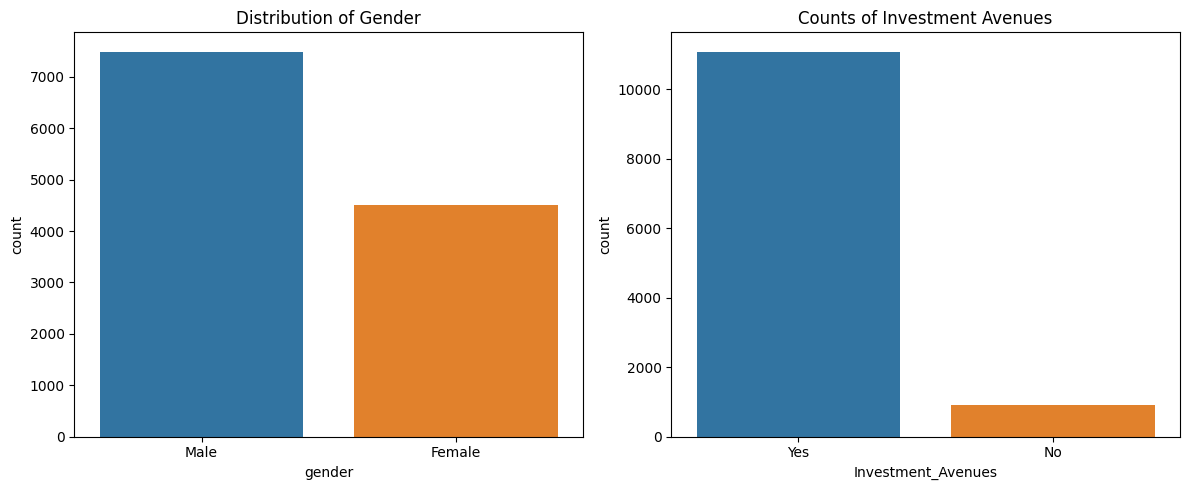

In [8]:
plt.figure(figsize=(12, 5))
# Gender Count 
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='gender', hue=df['gender'])
plt.tight_layout()
plt.title('Distribution of Gender')

# Investment_Avenues Count
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Investment_Avenues', hue=df['Investment_Avenues'])
plt.title('Counts of Investment Avenues')
plt.tight_layout()
plt.show()

## Feature Engineering

In [9]:
required_features = ['age', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']
missing_features = [feat for feat in required_features if feat not in df.columns]
if missing_features:
    raise ValueError(f"Missing required features for modeling: {missing_features}")

## Train Test Split and Model Selection

In [10]:
#  prepare the input and output feature
X = df[required_features]
y = df['Investment_Avenues']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')


Prediction Accuracy: 1.00


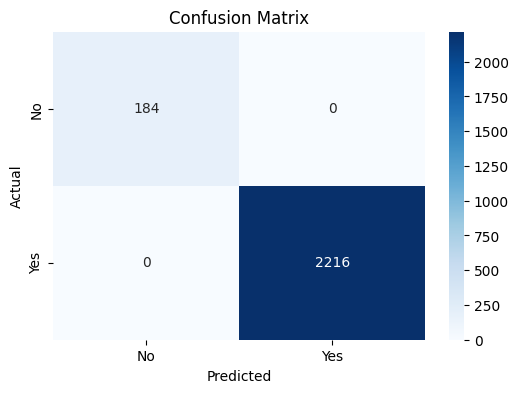

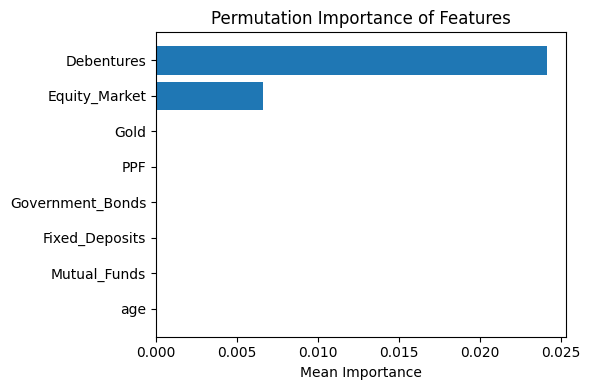

In [11]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Permutation Importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(6, 4))
plt.barh(np.array(required_features)[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Mean Importance')
plt.title('Permutation Importance of Features')
plt.tight_layout()
plt.show()